<h1 style="font-family:Alexandria,sans,serif;font-size: 60px;font-weight: bold;color: black;text-align: center">Welcome! it's 
<br><span style="color: dodgerblue">Chameleon</span> </h1>
<h5 style="font-family:Alexandria,sans,serif;font-size: 20px;font-weight: bold;color: black;text-align: center">Data Set Analysis for <span style="color: dodgerblue">November 2024</span> </h5>

<hr>

<img src="Screenshot 2024-12-06 181141.png" style="border-radius:14px;">
<a href="https://chameleon-nu.vercel.app">Chameleon Winter Version 1.7⛄</a>

<hr>

<h1 style="font-family: Alexandria,sans-serif;text-align:center;font-weight: bold;color: dodgerblue">importing our Basic Modules</h1>
<h3 style="font-family: Zain,sans-serif; text-align:center;">استدعاء المكتبات الاساسية</h3>


In [34]:
import pandas as pd #for data frames
import matplotlib.pyplot as plt #for ordinary plots
import numpy as np #for Numerical Computations 50X faster
import seaborn as sns #for Advanced plots

<hr>

<h1 style="font-family: Alexandria,sans-serif;text-align:center;font-weight: bold;color: dodgerblue">Loading Our Data Set (Chameleon data set)</h1>
<h3 style="font-family: Zain,sans-serif; text-align:center;">تحميل البيانات الخاصة بنا (بيانات كامليون لشهر نوفمبر)</h3>



In [35]:
data = pd.DataFrame(pd.read_csv('Chameleon Quizzes Data November.csv'))

<hr>

<h1 style="font-family: Alexandria,sans-serif;text-align:center;font-weight: bold;color: dodgerblue">Cleaning Our Data Set</h1>
<h3 style="font-family: Zain,sans-serif; text-align:center;">تنظيف البيانات الخاصة بنا</h3>



In [36]:
print(type(data))
print(data.shape)

#remove short names
for index, row in data.iterrows():
    if len(row["Name"]) < 3:
        data.drop(index, inplace=True)
print(f"Size without short names {len(data)}")

#remove any name with '.' in it
for index, row in data.iterrows():
    if row["Name"].find(".")!=-1 :
        data.drop(index, inplace=True)
print(f"Size without names with dots and short names {len(data)}")

#remove any name with special chars and it does not contain any spaces 
for index, row in data.iterrows():
    if not row["Name"].isalpha() and row["Name"].find(" ")==-1:
        data.drop(index, inplace=True)
print(f"Size without names with dots ,short names and special chars which are not spaces {len(data)}")

data = data.drop_duplicates(subset=['Name', 'Timestamp'], keep='first')
print(f"after dup size {len(data)}")
print(data.isnull().sum())

for index, row in data.iterrows():
    unique_count = len(set(row["Name"]))
    if unique_count<3:
        data.drop(index, inplace=True)
print(f"Final size {len(data)}")

<class 'pandas.core.frame.DataFrame'>
(4644, 8)
Size without short names 4101
Size without names with dots and short names 4071
Size without names with dots ,short names and special chars which are not spaces 3950
after dup size 3621
Unnamed: 0    0
Timestamp     0
Name          0
Score         0
Quiz Code     0
Gender        0
Region        0
Statue        0
dtype: int64
Final size 3513


<hr>

<h1 style="font-family: Alexandria,sans-serif;text-align:center;font-weight: bold;color: dodgerblue">Some Data Exploration</h1>
<h1 style="font-family: Alexandria,sans-serif;text-align:center;font-weight: bold;color: dodgerblue">Count all test categories that Available in Chameleon</h1>
<h3 style="font-family: Zain,sans-serif; text-align:center;">التعرف علي البيانات عن كثب</h3>
<h3 style="font-family: Zain,sans-serif; text-align:center;">عد جميع فئات الاختبارات المتحة علي كامليون</h3>
<h3 style="font-family: Zain,sans-serif; text-align:center; font-size:14px;color:dodgerblue;">اختبارات(البرمجة - الكمبيوتر - علوم البيانات) - النوع (ذكر ام انثي) - بداية الاختبارات (منذ - حتي - عدد الايام في الفترة الزمنية) وطباعة كل هذه البيانات</h3>




In [37]:
# Initialize a dictionary to track counts for each category
quiz_counts = {"Computer Systems": 0, "Programming": 0, "Data Science": 0}

# Define a function to categorize based on the starting digits of Quiz Code
def categorize_quiz_code(code):
    code_str = str(code)
    if code_str.startswith("46"):
        quiz_counts["Computer Systems"] += 1
        return "Computer Systems"
    elif code_str.startswith("30"):
        quiz_counts["Programming"] += 1
        return "Programming"
    elif code_str.startswith("77"):
        quiz_counts["Data Science"] += 1
        return "Data Science"
    else:
        return "Other"

# Add a new column for Category
data['Category'] = data['Quiz Code'].apply(categorize_quiz_code)

prog_success_df = data[(data['Statue'] == 'Success') & (data['Category'] == 'Programming')]
cs_success_df = data[(data['Statue'] == 'Success') & (data['Category'] == 'Computer Systems')]
ds_success_df = data[(data['Statue'] == 'Success') & (data['Category'] == 'Data Science')]


# Ensure the 'Timestamp' column is in datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Calculate the number of males and females
Males = (data['Gender'] == 'Male').sum()
Females = (data['Gender'] == 'Female').sum()

# Find the start and finish dates
start_date = data['Timestamp'].min()
finish_date = data['Timestamp'].max()

# Calculate the number of days between them
days_difference = (finish_date - start_date).days

# Get unique regions
unique_regions = set(data["Region"])

# Display results
print(f"Computer Systems Quizzes: {quiz_counts['Computer Systems']}")
print(f"Programming Quizzes: {quiz_counts['Programming']}")
print(f"Data Science Quizzes: {quiz_counts['Data Science']}")
print(f"Start Date: {start_date}")
print(f"Finish Date: {finish_date}")
print(f"Number of Days Between: {days_difference}")
print(f"Number of Males: {Males}")
print(f"Number of Females: {Females}")
print(f"Unique Regions: {unique_regions}")


Computer Systems Quizzes: 952
Programming Quizzes: 1980
Data Science Quizzes: 581
Start Date: 2024-11-20 14:26:00
Finish Date: 2024-12-06 02:45:00
Number of Days Between: 15
Number of Males: 2164
Number of Females: 1349
Unique Regions: {'Sidi Gaber', 'Hadara', 'Smouha', 'Manshia', 'Wardian', 'Ajami'}


<hr>


<h1 style="font-family: Alexandria,sans-serif;text-align:center;font-weight: bold;color: dodgerblue">Drawing a Stacked plot that shows the Number of Successes in Each Category According to Each Region</h1>
<h3 style="font-family: Zain,sans-serif; text-align:center;">رسم اعمدة مكدسة لعرض نسب النجاح في كل مادة بناء علي توزيع المناطق الجغرافية</h3>
<h3 style="font-family: Zain,sans-serif; text-align:center; font-size:14px; color:dodgerblue;">المناطق المتاحة ( المنشية - سموحة - الورديان - الحضرة - سيدي جابر - العجمي )</h3>



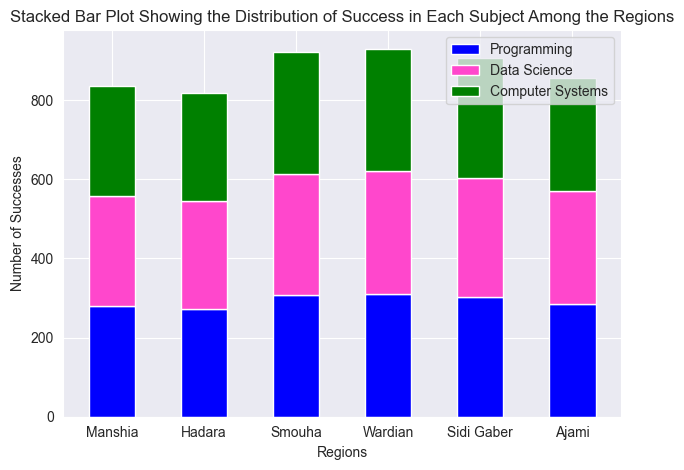

In [38]:
# Example data: Replace these with your actual data
regions = ["Manshia", "Hadara", "Smouha", "Wardian", "Sidi Gaber", "Ajami"]

programming_success = [prog_success_df[prog_success_df['Region'] == region].shape[0]for region in regions]

data_science_success = [prog_success_df[prog_success_df['Region'] == region].shape[0]for region in regions]

computer_system_success = [prog_success_df[prog_success_df['Region'] == region].shape[0]for region in regions]

# Convert to numpy arrays for stacking
programming = np.array(programming_success)
data_science = np.array(data_science_success)
computer_system = np.array(computer_system_success)

# Set bar width and positions
bar_width = 0.5
x_positions = np.arange(len(regions))

# Plot stacked bars
plt.bar(x_positions, programming, bar_width, label="Programming", color='blue')
plt.bar(x_positions, data_science, bar_width, bottom=programming, label="Data Science", color='#FF47CC')
plt.bar(x_positions, computer_system, bar_width, bottom=programming + data_science, label="Computer Systems", color='green')

# Add labels, title, and legend
plt.xlabel("Regions")
plt.ylabel("Number of Successes")
plt.title("Stacked Bar Plot Showing the Distribution of Success in Each Subject Among the Regions")
plt.xticks(x_positions, regions)  # Set x-axis labels
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


<hr>


<h1 style="font-family: Alexandria,sans-serif;text-align:center;font-weight: bold;color: dodgerblue">Drawing a bar chart that shows the Number of Males And Females in Each Quiz Category</h1>
<h3 style="font-family: Zain,sans-serif; text-align:center;">رسم مخطط عمودي لعرض عدد الطلاب الذكور والإناث في كل فئة</h3>


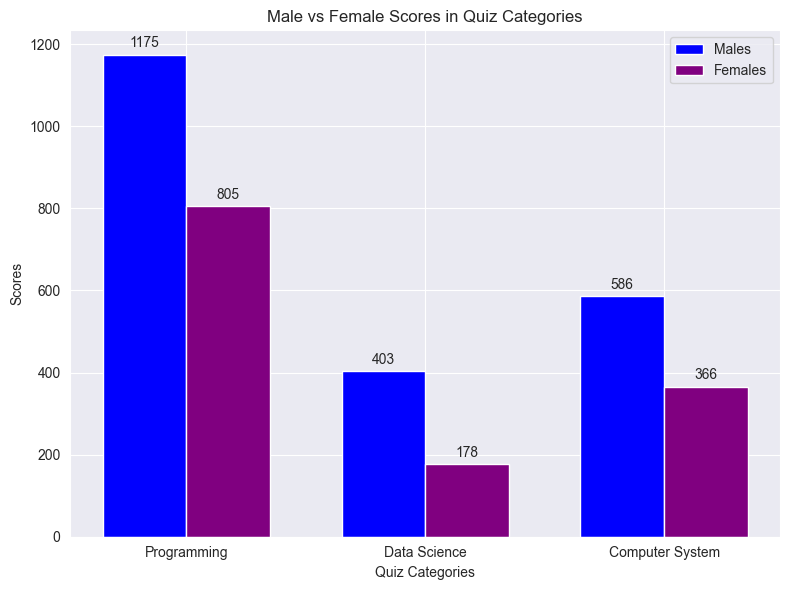

In [41]:
male_scores = [
    ((data["Quiz Code"].astype(str).str.startswith("30")) & (data["Gender"] == 'Male')).sum(),
    ((data["Quiz Code"].astype(str).str.startswith("77")) & (data["Gender"] == 'Male')).sum(),
    ((data["Quiz Code"].astype(str).str.startswith("46")) & (data["Gender"] == 'Male')).sum()
]

female_scores = [
    ((data["Quiz Code"].astype(str).str.startswith("30")) & (data["Gender"] == 'Female')).sum(),
    ((data["Quiz Code"].astype(str).str.startswith("77")) & (data["Gender"] == 'Female')).sum(),
    ((data["Quiz Code"].astype(str).str.startswith("46")) & (data["Gender"] == 'Female')).sum()
]

# Setting up the figure
categories = ['Programming', 'Data Science', 'Computer System']
x = np.arange(len(categories))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots(figsize=(8, 6))

# Plotting grouped bars
bars_male = ax.bar(x - width / 2, male_scores, width, label='Males', color='blue')
bars_female = ax.bar(x + width / 2, female_scores, width, label='Females', color='purple')

# Adding labels and title
ax.set_xlabel('Quiz Categories')
ax.set_ylabel('Scores')
ax.set_title('Male vs Female Scores in Quiz Categories')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Adding value annotations on bars
for bar in bars_male + bars_female:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset text by 3 units
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

<hr>


<h1 style="font-family: Alexandria,sans-serif;text-align:center;font-weight: bold;color: dodgerblue">Drawing a HeatMap that shows the Distributuon Website Requests per hours Among the Week</h1>
<h3 style="font-family: Zain,sans-serif; text-align:center;">رسم خريطة حرارية لعرض توزيع طلبات الموقع في كل ساعة علي مدار الاسبوع</h3>


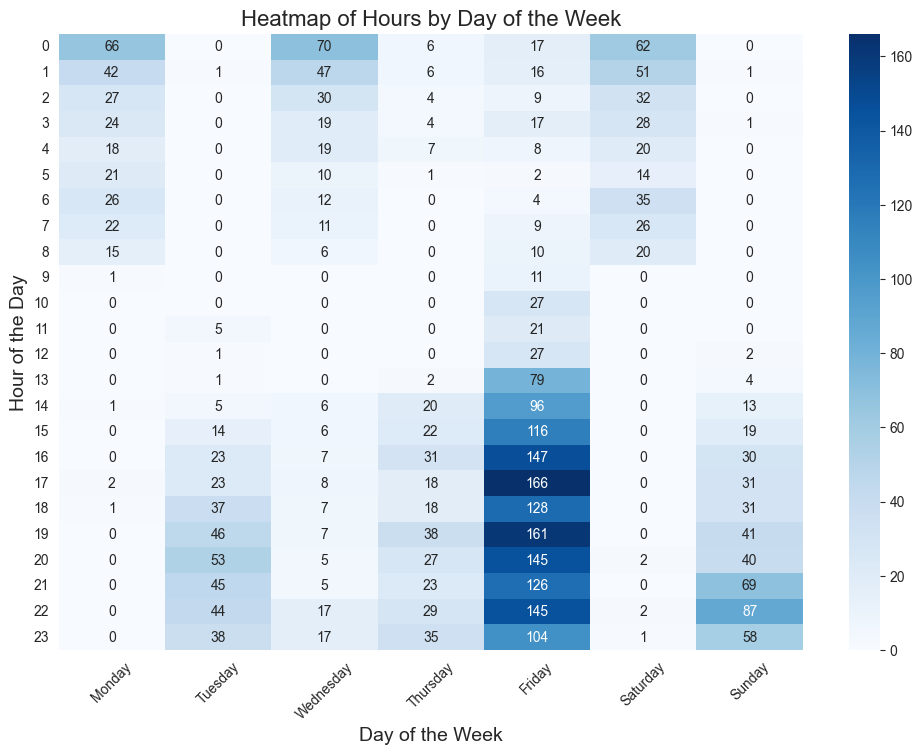

In [42]:
#Convert the 'timestamp' column to a datetime object
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

#Extract the day of the week and hour from the timestamp
data['day_of_week'] = data['Timestamp'].dt.day_name()
data['hour'] = data['Timestamp'].dt.hour

#Create a pivot table for visualization
pivot_table = data.pivot_table(index='hour', columns='day_of_week', aggfunc='size', fill_value=0)

#Reorder the days of the week
pivot_table = pivot_table.reindex(columns=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

#Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt="d", cbar=True)
plt.title('Heatmap of Hours by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Hour of the Day', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

<h3 style="font-family: Zain,sans-serif; text-align:center;font-size:16px;">يمكننا استنتاج وقت النشاط الاقصي للموقع خلال هذه الفترة</h3>


<hr>

<h1 style="font-family: Alexandria,sans-serif;text-align:center;font-weight: bold;color: dodgerblue">Draw boxplot (shows the distribution Without Outliers)</h1>
<h3 style="font-family: Zain,sans-serif; text-align:center;">رسم مخطط صندوقي (يظهر التوزيع بدون القيم المتطرفة)</h3>
<h3 style="font-family: Zain,sans-serif; text-align:center; font-size:14px; color:dodgerblue;">درجات الطلاب ما بين 100 ل 0 وهذا لا يحتوي علي قيم متطرفة وازالتها ستفسد بعض من خصائص البيانات</h3>



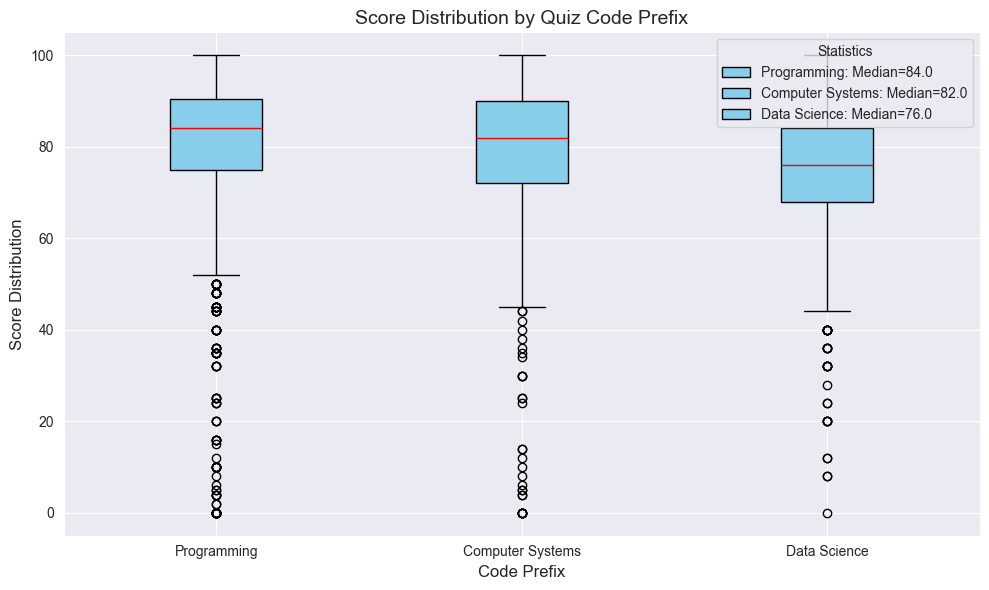

In [43]:
data['Quiz Code'] = data['Quiz Code'].astype(str)
prefixes = ['30', '46', '77']
categories = ['Programming', 'Computer Systems', 'Data Science']

prefix_scores = {prefix: data[data['Quiz Code'].str.startswith(prefix)]['Score'] for prefix in prefixes}

# Compute statistics for the legend
stats = {category: {
    'min': scores.min(),
    'max': scores.max(),
    'median': scores.median()
} for category, scores in zip(categories, prefix_scores.values())}

plt.figure(figsize=(10, 6))

plt.boxplot(
    prefix_scores.values(),
    tick_labels=categories,
    patch_artist=True,
    boxprops=dict(facecolor='skyblue', color='black'),
    medianprops=dict(color='red'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

legend_text = [
    f"{category}: Median={values['median']:.1f}"
    for category, values in stats.items()
]

plt.legend(legend_text, title="Statistics", loc='upper right', fontsize=10)

plt.xlabel('Code Prefix', fontsize=12)
plt.ylabel('Score Distribution', fontsize=12)
plt.title('Score Distribution by Quiz Code Prefix', fontsize=14)

plt.tight_layout()
plt.show()



<hr>

<h1 style="font-family: Alexandria,sans-serif;text-align:center;font-weight: bold;color: dodgerblue">Drawing A pie chart that shows the Percentage value for each category</h1>
<h3 style="font-family: Zain,sans-serif; text-align:center;">رسم مخطط دائري لعرض النسبة المئوية لكل فئة</h3>



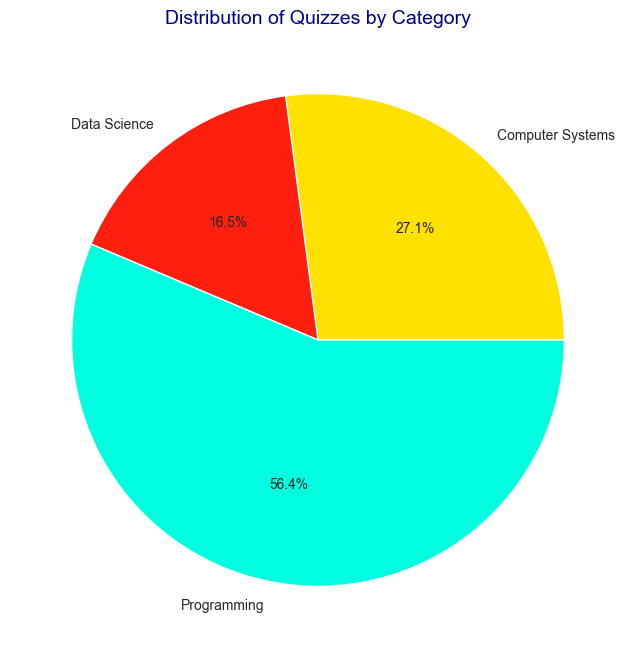

In [44]:
categories = ['Computer Systems', 'Data Science', 'Programming']
quizzes = [quiz_counts["Computer Systems"], quiz_counts["Data Science"], quiz_counts["Programming"]]

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(
    quizzes,
    labels=categories,
    colors=['#ffe100', '#fe1f0e', '#00ffe1'],
    autopct='%1.1f%%',  # Show percentages
)

ax.set_title('Distribution of Quizzes by Category', color='darkblue', fontsize=14)
plt.show()

<hr>


<h1 style="font-family: Alexandria,sans-serif;text-align:center;font-weight: bold;color: dodgerblue">Drawing a bar plot that shows the Number of solved Quizzes for Each Day</h1>
<h3 style="font-family: Zain,sans-serif; text-align:center;">رسم مخطط عمودي لعرض عدد الاختبارات المُجابة في كل يوم بداية من 20 نوفمبر</h3>


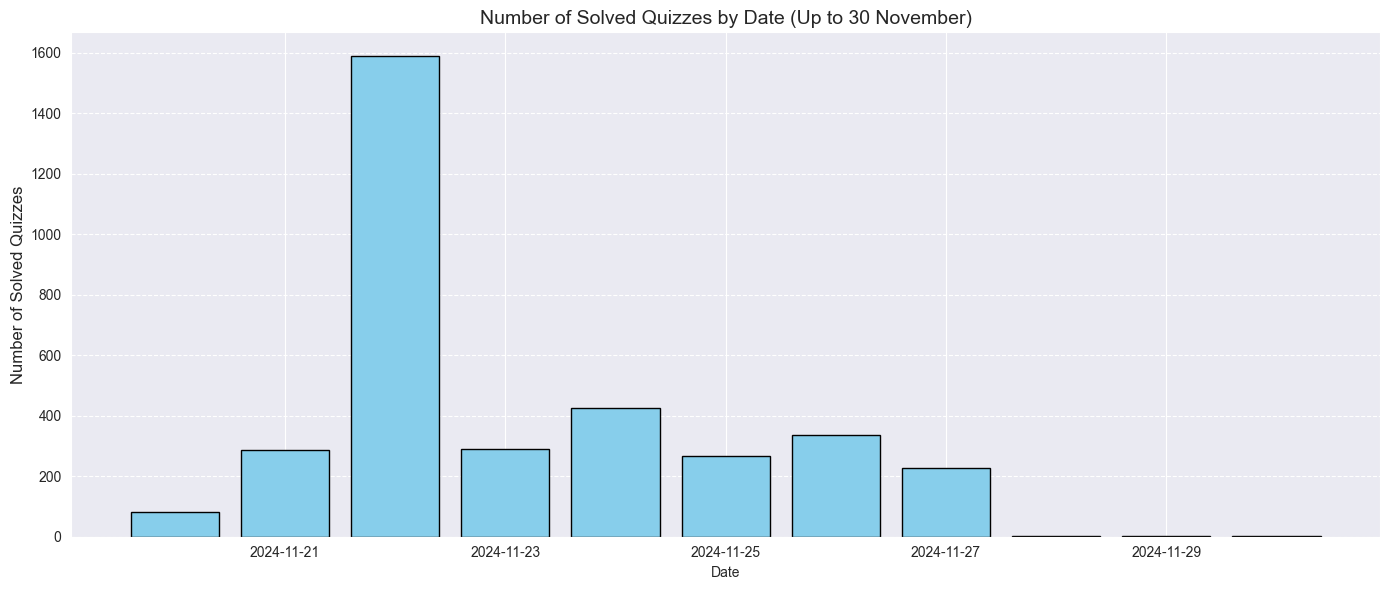

In [61]:
# Convert 'Timestamp' to datetime and extract the date
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Date'] = data['Timestamp'].dt.date  # Extract only the date (year-month-day)

# Filter dates up to 30 November
cutoff_date = pd.to_datetime("2024-11-30").date()
filtered_data = data[data['Date'] <= cutoff_date]

# Group by date and count solved quizzes
daily_counts = filtered_data.groupby('Date').size()

# Plot the data
plt.figure(figsize=(14, 6))
plt.bar(daily_counts.index, daily_counts.values, color='skyblue', edgecolor='black')

# Add labels, title, and other plot elements
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Solved Quizzes', fontsize=12)
plt.title('Number of Solved Quizzes by Date (Up to 30 November)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=1)

# Adjust layout and display
plt.tight_layout()
plt.show()


<hr>

<span style="color:black;">
# Data Science & Analysis Project

Welcome to the **Data Science & Analysis Project** repository! This project is focused on analyzing datasets and applying data science techniques to derive meaningful insights and predictions.

## Team Members & Roles

### 🧑‍💻 Abdelrhman Ahmed Abdelmonem
- **ID:** 23011311
- **Role:** Data Scientist & Machine Learning Engineer
- **Responsibilities:**
  - Develop machine learning models for prediction and classification tasks.
  - Preprocess and clean the data.
  - Perform feature engineering and model evaluation.

#### Skills:
- Python (Pandas, NumPy, Flask)
- Machine Learning (Supervised, Unsupervised)
- Data Preprocessing and Feature Engineering

---

### 👨‍💻 Fares Mohamed Hassan
- **ID:** 23012193
- **Role:** Data Analyst & Visualization Expert
- **Responsibilities:**
  - Analyze the datasets and generate meaningful insights.
  - Create visualizations using libraries like Matplotlib, Seaborn, and Plotly.
  - Develop interactive dashboards for presenting findings.

#### Skills:
- Data Analysis (Python, SQL)
- Data Visualization (Matplotlib, Seaborn, Plotly)
- Dashboard Development (Power BI, Tableau)

---

### 👨‍💻 Abdelrahman Magdy
- **ID:** 23011324
- **Role:** Data Engineer
- **Responsibilities:**
  - Design and implement data pipelines.
  - Work with large datasets and databases.
  - Ensure data quality and automate data collection.

#### Skills:
- Data Engineering (SQL, ETL, Big Data)
- Database Management (MySQL, PostgreSQL)
- Cloud Platforms (AWS, Azure)

---

### 👨‍🔬 Mahmoud Reda Mahmoud
- **ID:** 23011515
- **Role:** Project Manager & Research Analyst
- **Responsibilities:**
  - Manage the project timeline and milestones.
  - Conduct research on relevant data science methodologies.
  - Oversee the overall progress and ensure collaboration among team members.

#### Skills:
- Project Management (Agile, Scrum)
- Research & Reporting
- Collaboration and Communication

---

## Contact
Feel free to reach out to any of the team members for questions or clarifications!

---

### Contributing to the Project
We encourage you to contribute! Please fork this repository and submit pull requests with any changes, improvements, or fixes.
</span

